In [4]:
import pandas as pd
import numpy as np


import io 
import requests 
import os
import glob
#plots
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io
import scipy.stats as stats

In [5]:
# TSC
# grab csv files that we want
# make a big table for WT
# make a big table for KO, we will do individual rats if we have to later
# WT = 185,187,186?
# KO = 183,181,182
rat_00138 = pd.read_csv('RP2_00138.csv') # get rat
rat_00138['Genotype'] = "TSC_KO" # add column with genotype
rat_00138['ID'] = "00181" # add rat number

rat_00139 = pd.read_csv('RP3_00139.csv') # get rat
rat_00139['Genotype'] = "TSC_KO" # add column with genotype
rat_00139['ID'] = "00182" # add rat number

rat_00144 = pd.read_csv('GP1_00144.csv') # get rat
rat_00144['Genotype'] = "TSC_KO" # add column with genotype
rat_00144['ID'] = "00183" # add rat number

rat_00141 = pd.read_csv('RP5_00141.csv') # get rat
rat_00141['Genotype'] = "TSC_KO" # add column with genotype
rat_00141['ID'] = "00141" # add rat number

rat_00145 = pd.read_csv('GP3_00145.csv') # get rat
rat_00145['Genotype'] = "TSC_KO" # add column with genotype
rat_00145['ID'] = "00145" # add rat number

rat_00161 = pd.read_csv('GP5_00161.csv') # get rat
rat_00161['Genotype'] = "TSC_KO" # add column with genotype
rat_00161['ID'] = "00161" # add rat number



TSC_KO_ls = pd.concat([rat_00138,rat_00139,rat_00144,rat_00141,rat_00145,rat_00161],ignore_index=True) # append the wildtype rats together
TSC_KO_ls

,Wave_amp,Wave_lat,current_inten,current_freq,current_ear,current_wave,current_rms,Genotype,ID
0,0.0,0.0,90,0,1,1,4.077515e-07,TSC_KO,00181
1,0.0,0.0,90,0,1,2,4.077515e-07,TSC_KO,00181
2,0.0,0.0,90,0,1,3,4.077515e-07,TSC_KO,00181
3,0.0,0.0,90,0,1,4,4.077515e-07,TSC_KO,00181
4,0.0,0.0,90,0,1,5,4.077515e-07,TSC_KO,00181
...,...,...,...,...,...,...,...,...,...
1545,0.0,0.0,0,0,2,1,1.283253e-07,TSC_KO,00161
1546,0.0,0.0,0,0,2,2,1.283253e-07,TSC_KO,00161
1547,0.0,0.0,0,0,2,3,1.283253e-07,TSC_KO,00161
1548,0.0,0.0,0,0,2,4,1.283253e-07,TSC_KO,00161


In [6]:
rat_00137 = pd.read_csv('RP1_00137.csv') # get rat
rat_00137['Genotype'] = "TSC_WT" # add column with genotype
rat_00137['ID'] = "00185" # add rat number


rat_00140 = pd.read_csv('RP4_00140.csv') # get rat
rat_00140['Genotype'] = "TSC_WT" # add column with genotype
rat_00140['ID'] = "00187" # add rat number

rat_00153 = pd.read_csv('GP4_00153.csv') # get rat
rat_00153['Genotype'] = "TSC_WT" # add column with genotype
rat_00153['ID'] = "00186" # add rat number

rat_00142 = pd.read_csv('RP6_00142.csv') # get rat
rat_00142['Genotype'] = "TSC_WT" # add column with genotype
rat_00142['ID'] = "00142" # add rat number

rat_00162 = pd.read_csv('GP6_00162.csv') # get rat
rat_00162['Genotype'] = "TSC_WT" # add column with genotype
rat_00162['ID'] = "00162" # add rat number

rat_00150 = pd.read_csv('GP2_00150.csv') # get rat
rat_00150['Genotype'] = "TSC_WT" # add column with genotype
rat_00150['ID'] = "00150" # add rat number

TSC_WT_ls = pd.concat([rat_00137,rat_00140,rat_00153,rat_00142,rat_00162,rat_00150], ignore_index=True) # append the het rats together
TSC_WT_ls

,Wave_amp,Wave_lat,current_inten,current_freq,current_ear,current_wave,current_rms,Genotype,ID
0,2.324,1.300000,90,0,1,1,6.567475e-07,TSC_WT,00185
1,2.842,2.281818,90,0,1,2,6.567475e-07,TSC_WT,00185
2,0.658,3.136364,90,0,1,3,6.567475e-07,TSC_WT,00185
3,1.694,4.209091,90,0,1,4,6.567475e-07,TSC_WT,00185
4,0.378,5.445455,90,0,1,5,6.567475e-07,TSC_WT,00185
...,...,...,...,...,...,...,...,...,...
1555,0.000,0.000000,0,0,2,1,1.561036e-07,TSC_WT,00150
1556,0.000,0.000000,0,0,2,2,1.561036e-07,TSC_WT,00150
1557,0.000,0.000000,0,0,2,3,1.561036e-07,TSC_WT,00150
1558,0.000,0.000000,0,0,2,4,1.561036e-07,TSC_WT,00150


In [7]:
TSC_all_ls = pd.concat([TSC_WT_ls,TSC_KO_ls], ignore_index=True) # combine both dataframes


TSC_WT_ls = TSC_WT_ls[TSC_WT_ls.Wave_amp != 0] # just in case we need the genotype arrays later
TSC_KO_ls = TSC_KO_ls[TSC_KO_ls.Wave_amp != 0]

TSC_all_ls = TSC_all_ls[TSC_all_ls.Wave_amp != 0] # removes every row where column 1 is 0

# use for only BBN data otherwise delete
TSC_WT_ls = TSC_WT_ls.loc[TSC_WT_ls['current_freq'] == 0]
TSC_KO_ls = TSC_KO_ls.loc[TSC_KO_ls['current_freq'] == 0]
TSC_all_ls = TSC_all_ls.loc[TSC_all_ls['current_freq'] == 0]

TSC_all_ls
TSC_all_ls.to_csv('TSC_all_data.csv', index=False)

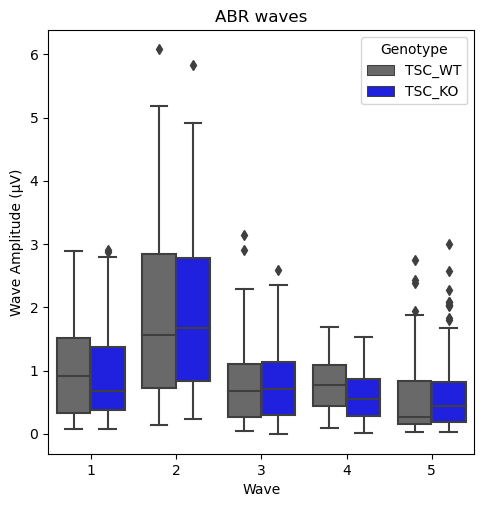

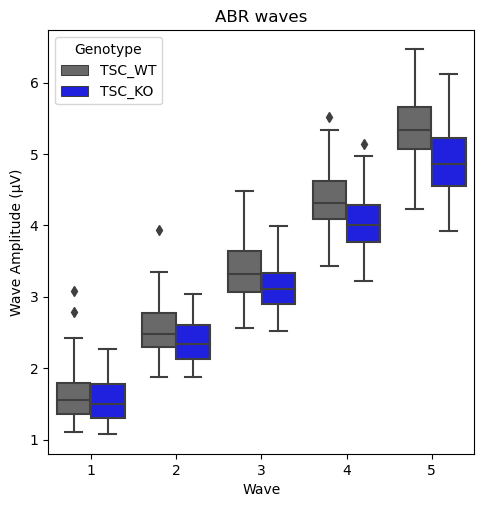

In [47]:
#box plot for all waves averaging intensity
fig1,ax1 = plt.subplots()
colors = ["#696969","#0000FF"]
sns.set_palette(sns.color_palette(colors))
sns.boxplot(data=TSC_all_ls, x="current_wave", y="Wave_amp",hue = "Genotype")
plt.ylabel('Wave Amplitude (µV)')
plt.xlabel('Wave')
plt.title('ABR waves')
plt.savefig('Haichao_ABR waves.pdf',dpi=400)

fig1,ax1 = plt.subplots()
colors = ["#696969","#0000FF"]
sns.set_palette(sns.color_palette(colors))
sns.boxplot(data=TSC_all_ls, x="current_wave", y="Wave_lat",hue = "Genotype")
plt.ylabel('Wave Amplitude (µV)')
plt.xlabel('Wave')
plt.title('ABR waves')
plt.savefig('Haichao_ABR waves2.pdf',dpi=400)

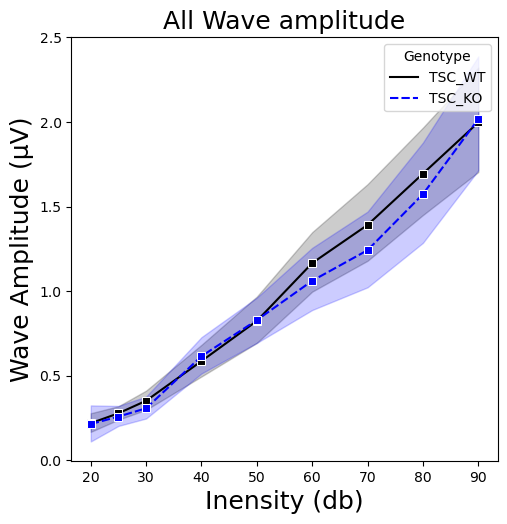

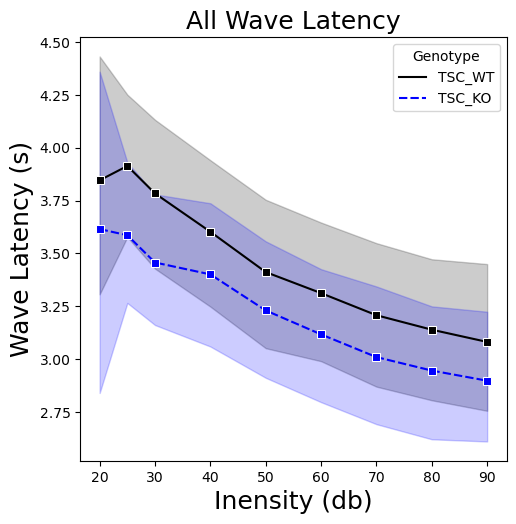

In [48]:
# graph avg wave amplitude

fig1,ax1 = plt.subplots()
colors = ["#000000","#0000FF"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=TSC_all_ls, x="current_inten", y="Wave_amp",hue = "Genotype",style='Genotype',ci=95,marker='s')
plt.rcParams["figure.figsize"] = [5.5, 5.5]
plt.ylabel('Wave Amplitude (µV)', fontsize=18)
plt.xlabel('Inensity (db)', fontsize=18)
plt.title('All Wave amplitude', fontsize=18)
plt.savefig('Haichao_TSC_allwave_amp.pdf',dpi=400)
# graph avg latency
fig1,ax1 = plt.subplots()
colors = ["#000000","#0000FF"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=TSC_all_ls, x="current_inten", y="Wave_lat",hue = "Genotype",style='Genotype',ci=95,marker='s')
plt.ylabel('Wave Latency (s)', fontsize=18)
plt.xlabel('Inensity (db)', fontsize=18)
plt.title('All Wave Latency', fontsize=18)
plt.savefig('Haichao_TSC_allwave_lat.pdf',dpi=400)

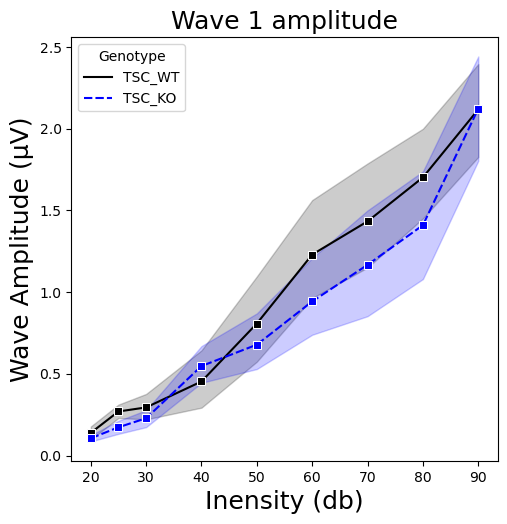

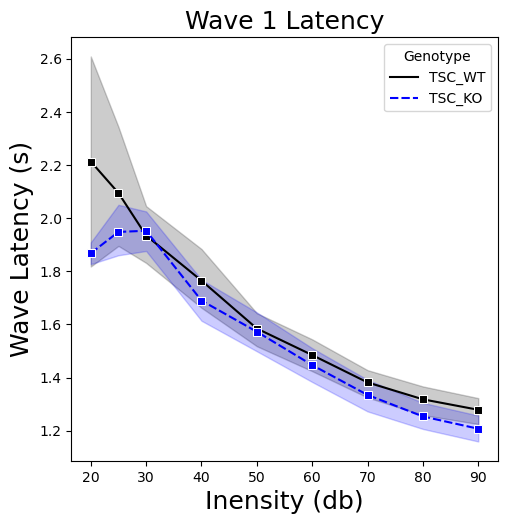

In [49]:
wave1_all = TSC_all_ls.loc[TSC_all_ls['current_wave'] == 1] # only want wave 1 data

fig1,ax1 = plt.subplots()
colors = ["#000000","#0000FF"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=wave1_all, x="current_inten", y="Wave_amp",hue = "Genotype",style='Genotype',ci=95,marker='s')
plt.ylabel('Wave Amplitude (µV)', fontsize=18)
plt.xlabel('Inensity (db)', fontsize=18)
plt.title('Wave 1 amplitude', fontsize=18)
plt.savefig('Haichao_TSC_wave1_amp.pdf',dpi=400)
# graph wave 1 latency
fig1,ax1 = plt.subplots()
colors = ["#000000","#0000FF"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=wave1_all, x="current_inten", y="Wave_lat",hue = "Genotype",style='Genotype',ci=95,marker='s')
plt.ylabel('Wave Latency (s)', fontsize=18)
plt.xlabel('Inensity (db)', fontsize=18)
plt.title('Wave 1 Latency', fontsize=18)
plt.savefig('Haichao_TSC_wave1_lat.pdf',dpi=400)

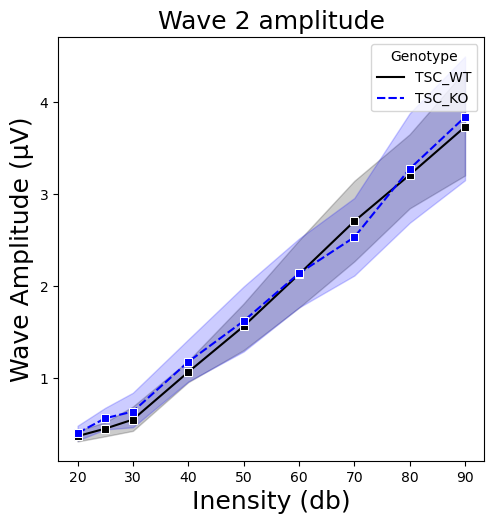

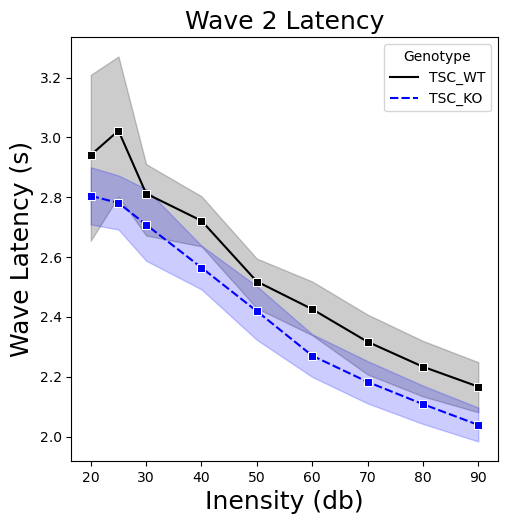

In [50]:
wave2_all = TSC_all_ls.loc[TSC_all_ls['current_wave'] == 2] # only want wave 2 data

fig1,ax1 = plt.subplots()
colors = ["#000000","#0000FF"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=wave2_all, x="current_inten", y="Wave_amp",hue = "Genotype",style='Genotype',ci=95,marker='s')
plt.ylabel('Wave Amplitude (µV)', fontsize=18)
plt.xlabel('Inensity (db)', fontsize=18)
plt.title('Wave 2 amplitude', fontsize=18)
plt.savefig('Haichao_TSC_wave2_amp.pdf',dpi=400)
# graph wave 2 latency
fig1,ax1 = plt.subplots()
colors = ["#000000","#0000FF"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=wave2_all, x="current_inten", y="Wave_lat",hue = "Genotype",style='Genotype',ci=95,marker='s')
plt.ylabel('Wave Latency (s)', fontsize=18)
plt.xlabel('Inensity (db)', fontsize=18)
plt.title('Wave 2 Latency', fontsize=18)
plt.savefig('Haichao_TSC_wave2_lat.pdf',dpi=400)

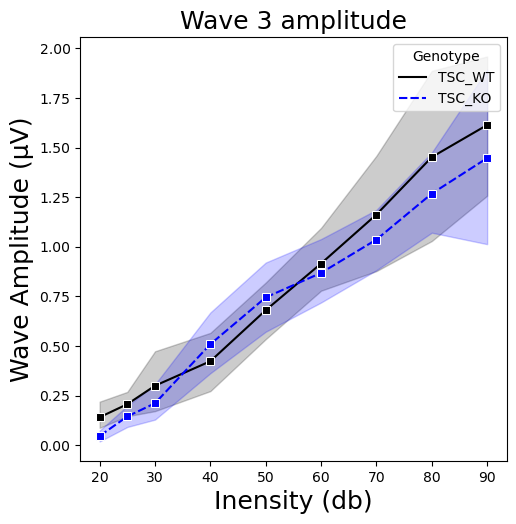

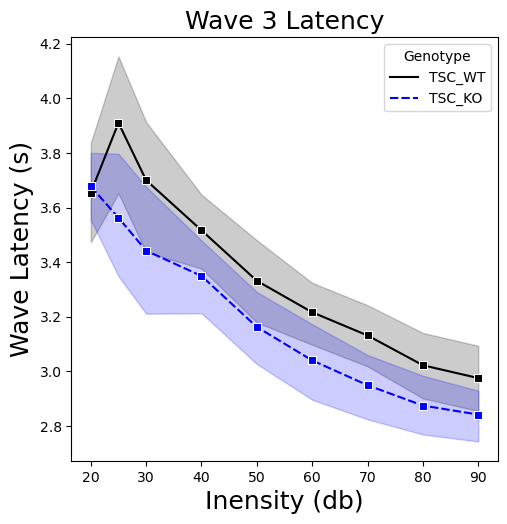

In [52]:
wave3_all = TSC_all_ls.loc[TSC_all_ls['current_wave'] == 3] # only want wave 2 data

fig1,ax1 = plt.subplots()
colors = ["#000000","#0000FF"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=wave3_all, x="current_inten", y="Wave_amp",hue = "Genotype",style='Genotype',ci=95,marker='s')
plt.ylabel('Wave Amplitude (µV)', fontsize=18)
plt.xlabel('Inensity (db)', fontsize=18)
plt.title('Wave 3 amplitude', fontsize=18)
plt.savefig('Haichao_TSC_wave3_amp.pdf',dpi=400)
# graph wave 2 latency
fig1,ax1 = plt.subplots()
colors = ["#000000","#0000FF"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=wave3_all, x="current_inten", y="Wave_lat",hue = "Genotype",style='Genotype',ci=95,marker='s')
plt.ylabel('Wave Latency (s)', fontsize=18)
plt.xlabel('Inensity (db)', fontsize=18)
plt.title('Wave 3 Latency', fontsize=18)
plt.savefig('Haichao_TSC_wave3_lat.pdf',dpi=400)

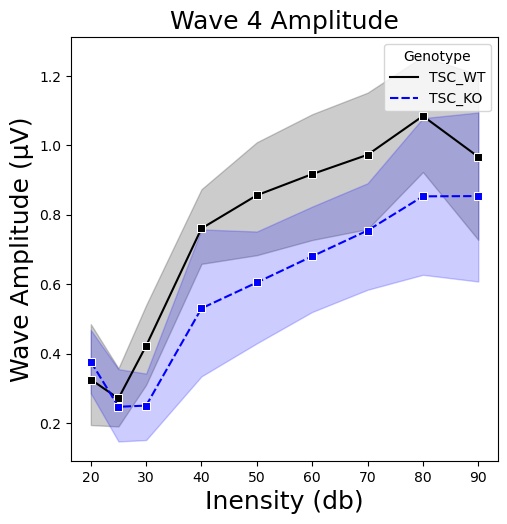

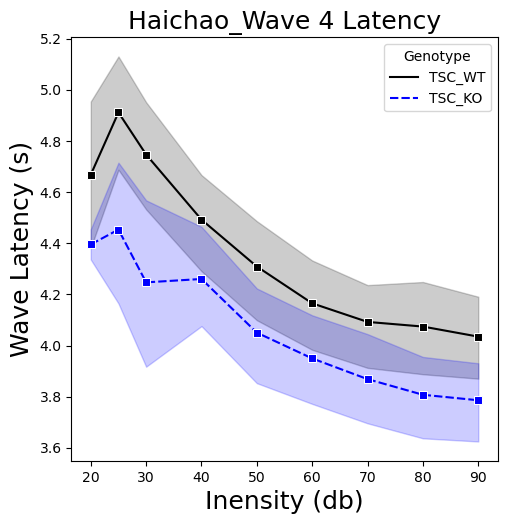

In [53]:
wave4_all = TSC_all_ls.loc[TSC_all_ls['current_wave'] == 4] # only want wave 4 data
# graph avg wave 4
fig1,ax1 = plt.subplots()
colors = ["#000000","#0000FF"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=wave4_all, x="current_inten", y="Wave_amp",hue = "Genotype",style='Genotype',ci=95,marker='s')
plt.ylabel('Wave Amplitude (µV)', fontsize=18)
plt.xlabel('Inensity (db)', fontsize=18)
plt.title('Wave 4 Amplitude', fontsize=18)
plt.savefig('Haichao_TSC_wave4_amp.pdf',dpi=400)
# graph avg wave 4
fig1,ax1 = plt.subplots()
colors = ["#000000","#0000FF"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=wave4_all, x="current_inten", y="Wave_lat",hue = "Genotype",style='Genotype',ci=95,marker='s')
plt.ylabel('Wave Latency (s)', fontsize=18)
plt.xlabel('Inensity (db)', fontsize=18)
plt.title('Haichao_Wave 4 Latency', fontsize=18)
plt.savefig('Haichao_TSC_wave4_lat.pdf',dpi=400)

In [55]:
#ANOVA test
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Perform the ANOVA test for genotype and latency
model = ols('Wave_lat ~ current_inten + Genotype + current_inten:Genotype', data=TSC_all_ls).fit()
# model = ols('Wave_amp ~  C(Genotype)', data=TSC_all_ls).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                             sum_sq     df          F        PR(>F)
Genotype                  11.822473    1.0   7.127260  7.724294e-03
current_inten             64.046432    1.0  38.610834  7.792435e-10
current_inten:Genotype     0.419335    1.0   0.252799  6.152298e-01
Residual                1544.313384  931.0        NaN           NaN


In [8]:
# Fmr1
# grab csv files that we want
# make a big table for WT
# make a big table for KO, we will do individual rats if we have to later

rat_00185 = pd.read_csv('BP4_00185.csv') # get rat
rat_00185['Genotype'] = "fmr1_WT" # add column with genotype
rat_00185['ID'] = "00137" # add rat number

rat_00187 = pd.read_csv('BP6_00187.csv') # get rat
rat_00187['Genotype'] = "fmr1_WT" # add column with genotype
rat_00187['ID'] = "00140" # add rat number

rat_00186 = pd.read_csv('LP2_00186.csv') # get rat
rat_00186['Genotype'] = "fmr1_WT" # add column with genotype
rat_00186['ID'] = "00153" # add rat number

rat_00214 = pd.read_csv('Purple4_00214.csv') # get rat
rat_00214['Genotype'] = "fmr1_WT" # add column with genotype
rat_00214['ID'] = "00214" # add rat number

rat_00184 = pd.read_csv('BP2_00184.csv') # get rat
rat_00184['Genotype'] = "fmr1_WT" # add column with genotype
rat_00184['ID'] = "00184" # add rat number

rat_00195 = pd.read_csv('LP3_00195.csv') # get rat
rat_00195['Genotype'] = "fmr1_WT" # add column with genotype
rat_00195['ID'] = "00195" # add rat number

fmr1_WT_ls = pd.concat([rat_00185,rat_00187,rat_00186,rat_00214,rat_00184,rat_00195],ignore_index=True) # append the wildtype rats together
fmr1_WT_ls

,Wave_amp,Wave_lat,current_inten,current_freq,current_ear,current_wave,current_rms,Genotype,ID
0,0.0,0.0,90,0,1,1,8.717888e-07,fmr1_WT,00137
1,0.0,0.0,90,0,1,2,8.717888e-07,fmr1_WT,00137
2,0.0,0.0,90,0,1,3,8.717888e-07,fmr1_WT,00137
3,0.0,0.0,90,0,1,4,8.717888e-07,fmr1_WT,00137
4,0.0,0.0,90,0,1,5,8.717888e-07,fmr1_WT,00137
...,...,...,...,...,...,...,...,...,...
1555,0.0,0.0,0,0,2,1,8.951595e-08,fmr1_WT,00195
1556,0.0,0.0,0,0,2,2,8.951595e-08,fmr1_WT,00195
1557,0.0,0.0,0,0,2,3,8.951595e-08,fmr1_WT,00195
1558,0.0,0.0,0,0,2,4,8.951595e-08,fmr1_WT,00195


In [9]:
rat_00181 = pd.read_csv('BP3_00181.csv') # get rat
rat_00181['Genotype'] = "fmr1_KO" # add column with genotype
rat_00181['ID'] = "00138" # add rat number

rat_00182 = pd.read_csv('BP5_00182.csv') # get rat
rat_00182['Genotype'] = "fmr1_KO" # add column with genotype
rat_00182['ID'] = "00139" # add rat number

rat_00183 = pd.read_csv('LP1_00183.csv') # get rat
rat_00183['Genotype'] = "fmr1_KO" # add column with genotype
rat_00183['ID'] = "00144" # add rat number

rat_00213 = pd.read_csv('Purple3_00213.csv') # get rat
rat_00213['Genotype'] = "fmr1_KO" # add column with genotype
rat_00213['ID'] = "00213" # add rat number

rat_00180 = pd.read_csv('BP1_00180.csv') # get rat
rat_00180['Genotype'] = "fmr1_KO" # add column with genotype
rat_00180['ID'] = "00180" # add rat number

rat_00198 = pd.read_csv('LP6_00198.csv') # get rat
rat_00198['Genotype'] = "fmr1_KO" # add column with genotype
rat_00198['ID'] = "00198" # add rat number

fmr1_KO_ls = pd.concat([rat_00181,rat_00182,rat_00183,rat_00213,rat_00180,rat_00198],ignore_index=True) # append the wildtype rats together
fmr1_KO_ls

,Wave_amp,Wave_lat,current_inten,current_freq,current_ear,current_wave,current_rms,Genotype,ID
0,0.0,0.0,90,0,1,1,8.925229e-07,fmr1_KO,00138
1,0.0,0.0,90,0,1,2,8.925229e-07,fmr1_KO,00138
2,0.0,0.0,90,0,1,3,8.925229e-07,fmr1_KO,00138
3,0.0,0.0,90,0,1,4,8.925229e-07,fmr1_KO,00138
4,0.0,0.0,90,0,1,5,8.925229e-07,fmr1_KO,00138
...,...,...,...,...,...,...,...,...,...
1555,0.0,0.0,0,0,2,1,8.529565e-08,fmr1_KO,00198
1556,0.0,0.0,0,0,2,2,8.529565e-08,fmr1_KO,00198
1557,0.0,0.0,0,0,2,3,8.529565e-08,fmr1_KO,00198
1558,0.0,0.0,0,0,2,4,8.529565e-08,fmr1_KO,00198


In [10]:
fmr1_ls = pd.concat([fmr1_KO_ls,fmr1_WT_ls],ignore_index=True)


fmr1_ls = fmr1_ls[fmr1_ls.Wave_amp != 0] # removes every row where column 1 is 0
fmr1_WT_ls = fmr1_WT_ls.loc[fmr1_WT_ls['current_freq'] == 0]
fmr1_KO_ls = fmr1_KO_ls.loc[fmr1_KO_ls['current_freq'] == 0]
fmr1_ls = fmr1_ls.loc[fmr1_ls['current_freq'] == 0]
fmr1_ls
fmr1_ls.to_csv('FMR1_all_data.csv', index=False)

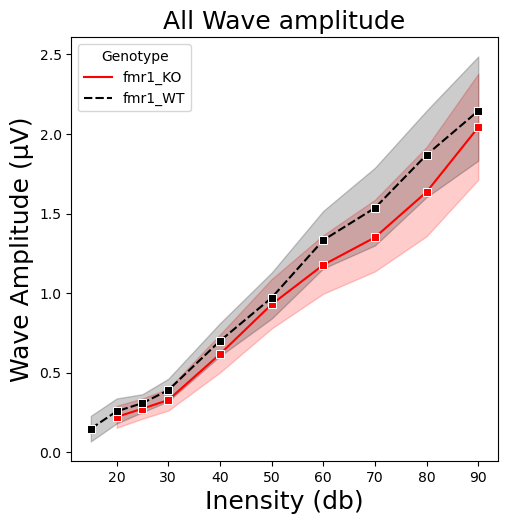

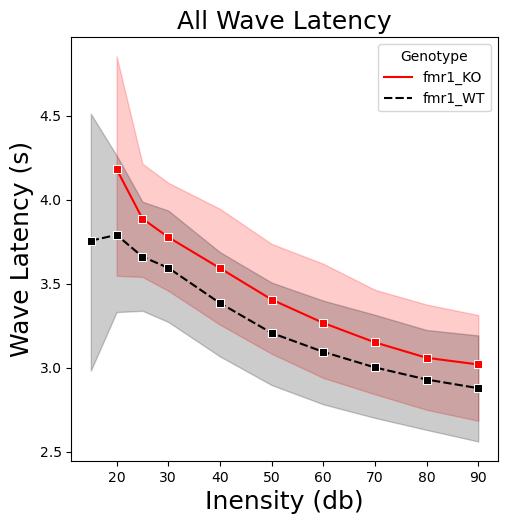

In [59]:
fig2,ax2 = plt.subplots()
colors = ["#FF0000","#000000"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=fmr1_ls, x="current_inten", y="Wave_amp",hue = "Genotype",style='Genotype',ci=95,marker='s')
plt.ylabel('Wave Amplitude (µV)', fontsize=18)
plt.xlabel('Inensity (db)', fontsize=18)
plt.title('All Wave amplitude', fontsize=18)
plt.savefig('Haichao_fmr1_allwave_amp.pdf',dpi=200)
# graph avg latency
fig2,ax2 = plt.subplots()
colors = ["#FF0000","#000000"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=fmr1_ls, x="current_inten", y="Wave_lat",hue = "Genotype",style='Genotype',ci=95,marker='s')
plt.ylabel('Wave Latency (s)', fontsize=18)
plt.xlabel('Inensity (db)', fontsize=18)
plt.title('All Wave Latency', fontsize=18)
plt.savefig('Haichao_fmr1_allwave_lat.pdf',dpi=200)

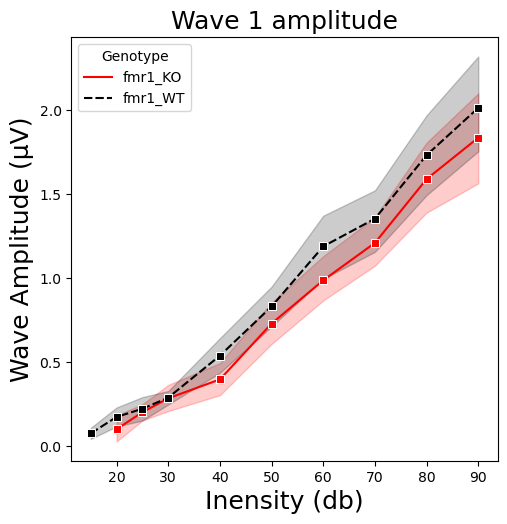

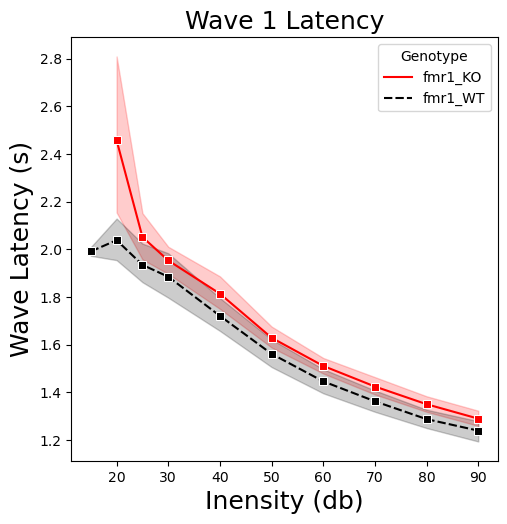

In [60]:
wave1_all_fmr1 = fmr1_ls.loc[fmr1_ls['current_wave'] == 1] # only want wave 1 data
# graph wave 1 amplitude
fig1,ax1 = plt.subplots()
colors = ["#FF0000","#000000"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=wave1_all_fmr1, x="current_inten", y="Wave_amp",hue = "Genotype",style='Genotype',ci=95,marker='s')
plt.ylabel('Wave Amplitude (µV)', fontsize=18)
plt.xlabel('Inensity (db)', fontsize=18)
plt.title('Wave 1 amplitude', fontsize=18)
plt.savefig('Haichao_fmr1_wave1_amp.pdf',dpi=200)

# graph wave 1 latency
fig1,ax1 = plt.subplots()
colors = ["#FF0000","#000000"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=wave1_all_fmr1, x="current_inten", y="Wave_lat",hue = "Genotype",style='Genotype',ci=95,marker='s')
plt.ylabel('Wave Latency (s)', fontsize=18)
plt.xlabel('Inensity (db)', fontsize=18)
plt.title('Wave 1 Latency', fontsize=18)
plt.savefig('Haichao_fmr1_wave1_lat.pdf',dpi=200)

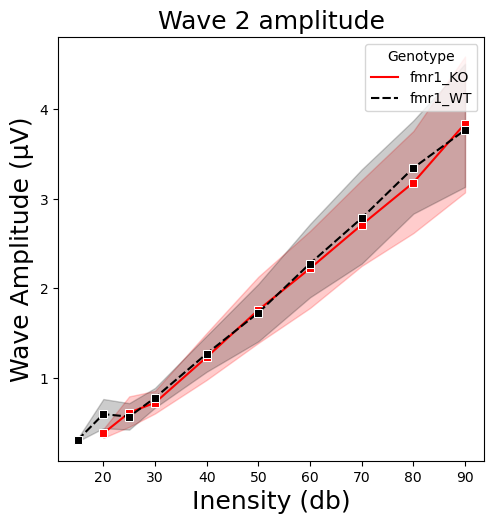

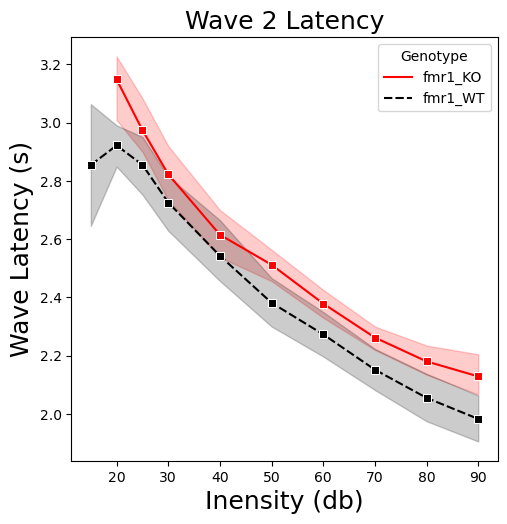

In [61]:
wave2_all_fmr1 = fmr1_ls.loc[fmr1_ls['current_wave'] == 2] # only want wave 2 data
# graph wave 2 amplitude
fig1,ax1 = plt.subplots()
colors = ["#FF0000","#000000"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=wave2_all_fmr1, x="current_inten", y="Wave_amp",hue = "Genotype",style='Genotype',ci=95,marker='s')
plt.ylabel('Wave Amplitude (µV)', fontsize=18)
plt.xlabel('Inensity (db)', fontsize=18)
plt.title('Wave 2 amplitude', fontsize=18)
plt.savefig('Haichao_fmr1_wave2_amp.pdf',dpi=200)

# graph wave 2 latency
fig1,ax1 = plt.subplots()
colors = ["#FF0000","#000000"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=wave2_all_fmr1, x="current_inten", y="Wave_lat",hue = "Genotype",style='Genotype',ci=95,marker='s')
plt.ylabel('Wave Latency (s)', fontsize=18)
plt.xlabel('Inensity (db)', fontsize=18)
plt.title('Wave 2 Latency', fontsize=18)
plt.savefig('Haichao_fmr1_wave2_lat.pdf',dpi=200)

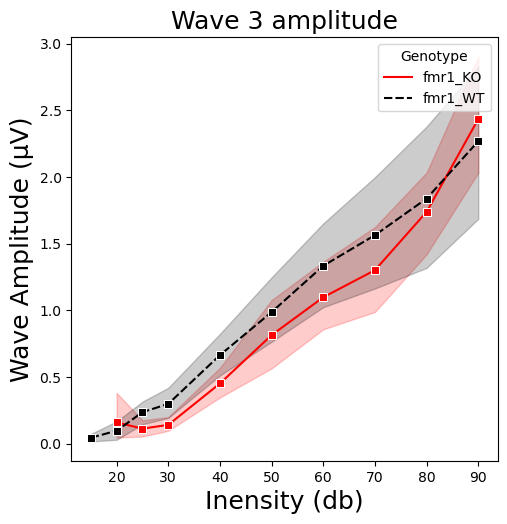

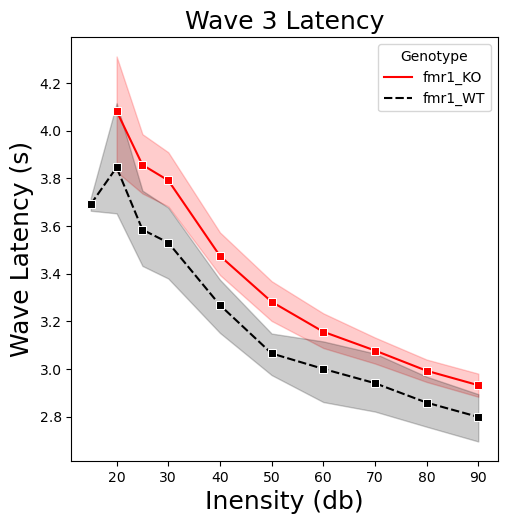

In [62]:
wave3_all_fmr1 = fmr1_ls.loc[fmr1_ls['current_wave'] == 3] # only want wave 2 data
# graph wave 2 amplitude
fig1,ax1 = plt.subplots()
colors = ["#FF0000","#000000"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=wave3_all_fmr1, x="current_inten", y="Wave_amp",hue = "Genotype",style='Genotype',ci=95,marker='s')
plt.ylabel('Wave Amplitude (µV)', fontsize=18)
plt.xlabel('Inensity (db)', fontsize=18)
plt.title('Wave 3 amplitude', fontsize=18)
plt.savefig('Haichao_fmr1_wave3_amp.pdf',dpi=200)

# graph wave 2 latency
fig1,ax1 = plt.subplots()
colors = ["#FF0000","#000000"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=wave3_all_fmr1, x="current_inten", y="Wave_lat",hue = "Genotype",style='Genotype',ci=95,marker='s')
plt.ylabel('Wave Latency (s)', fontsize=18)
plt.xlabel('Inensity (db)', fontsize=18)
plt.title('Wave 3 Latency', fontsize=18)
plt.savefig('Haichao_fmr1_wave3_lat.pdf',dpi=200)

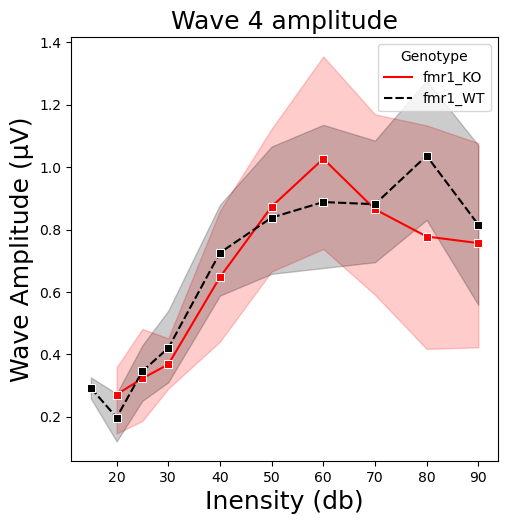

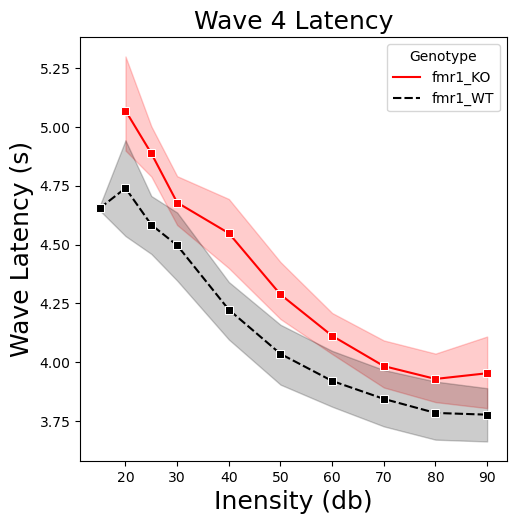

In [63]:
wave4_all_fmr1 = fmr1_ls.loc[fmr1_ls['current_wave'] == 4] # only want wave 4 data
# graph wave 4 amplitude
fig1,ax1 = plt.subplots()
colors = ["#FF0000","#000000"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=wave4_all_fmr1, x="current_inten", y="Wave_amp",hue = "Genotype",style='Genotype',ci=95,marker='s')
plt.ylabel('Wave Amplitude (µV)', fontsize=18)
plt.xlabel('Inensity (db)', fontsize=18)
plt.title('Wave 4 amplitude', fontsize=18)
plt.savefig('fmr1_wave4_amp.pdf',dpi=200)

# graph wave 4 latency
fig1,ax1 = plt.subplots()
colors = ["#FF0000","#000000"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=wave4_all_fmr1, x="current_inten", y="Wave_lat",hue = "Genotype",style='Genotype',ci=95,marker='s')
plt.ylabel('Wave Latency (s)', fontsize=18)
plt.xlabel('Inensity (db)', fontsize=18)
plt.title('Wave 4 Latency', fontsize=18)
plt.savefig('fmr1_wave4_lat.pdf',dpi=200)

In [64]:
# compare WTs
fmr1_WT_ls = fmr1_WT_ls[fmr1_WT_ls.Wave_amp != 0]
WT_ls = pd.concat([TSC_WT_ls,fmr1_WT_ls],ignore_index=True)

wave1_all_wt = WT_ls.loc[WT_ls['current_wave'] == 1] # only want wave 1 data
wave4_all_wt = WT_ls.loc[WT_ls['current_wave'] == 4] # only want wave 4 data

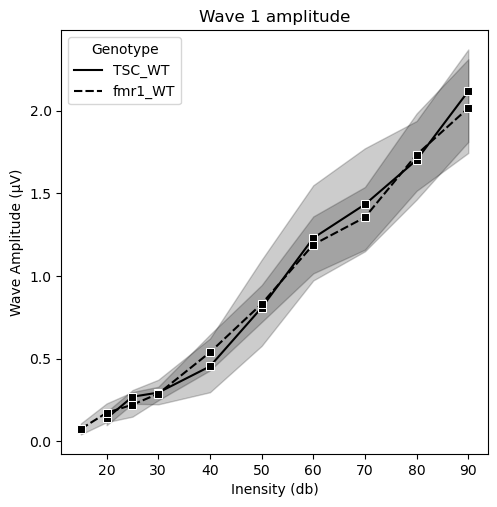

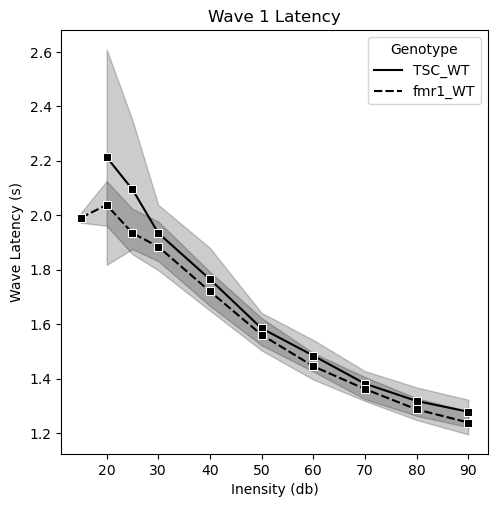

In [65]:
# graph wave 1 amplitude
fig1,ax1 = plt.subplots()
colors = ["#000000","#000000"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=wave1_all_wt, x="current_inten", y="Wave_amp",hue = "Genotype",style='Genotype',ci=95,marker='s')
plt.ylabel('Wave Amplitude (µV)')
plt.xlabel('Inensity (db)')
plt.title('Wave 1 amplitude')
plt.savefig('wt_wave1_amp.pdf',dpi=200)

# graph wave 1 latency
fig1,ax1 = plt.subplots()
colors = ["#000000","#000000"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=wave1_all_wt, x="current_inten", y="Wave_lat",hue = "Genotype",style='Genotype',ci=95,marker='s')
plt.ylabel('Wave Latency (s)')
plt.xlabel('Inensity (db)')
plt.title('Wave 1 Latency')
plt.savefig('wt_wave1_lat.pdf',dpi=200)

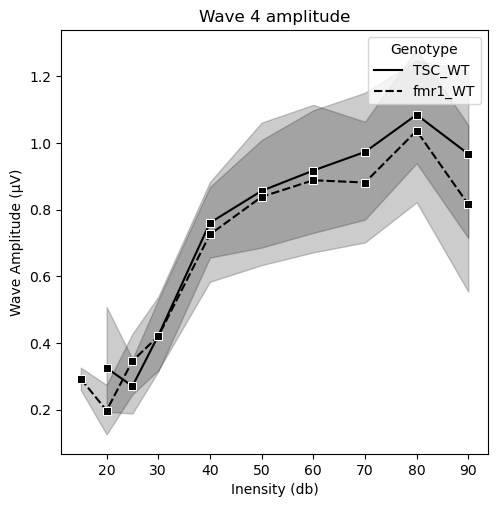

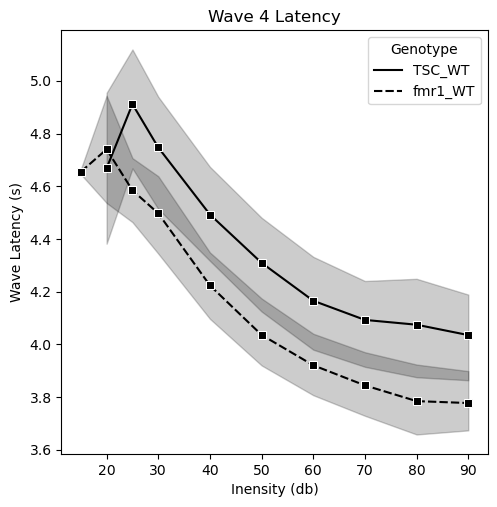

In [66]:
# graph wave 4 amplitude
fig1,ax1 = plt.subplots()
colors = ["#000000","#000000"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=wave4_all_wt, x="current_inten", y="Wave_amp",hue = "Genotype",style='Genotype',ci=95,marker='s')
plt.ylabel('Wave Amplitude (µV)')
plt.xlabel('Inensity (db)')
plt.title('Wave 4 amplitude')
plt.savefig('wt_wave1_amp.pdf',dpi=200)

# graph wave 4 latency
fig1,ax1 = plt.subplots()
colors = ["#000000","#000000"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=wave4_all_wt, x="current_inten", y="Wave_lat",hue = "Genotype",style='Genotype',ci=95,marker='s')
plt.ylabel('Wave Latency (s)')
plt.xlabel('Inensity (db)')
plt.title('Wave 4 Latency')
plt.savefig('wt_wave1_lat.pdf',dpi=200)

In [67]:
# compare KOs
fmr1_KO_ls = fmr1_KO_ls[fmr1_KO_ls.Wave_amp != 0]
KO_ls = pd.concat([TSC_KO_ls,fmr1_KO_ls],ignore_index=True)

wave1_all_ko = KO_ls.loc[KO_ls['current_wave'] == 1] # only want wave 1 data
wave4_all_ko = KO_ls.loc[KO_ls['current_wave'] == 4] # only want wave 4 data

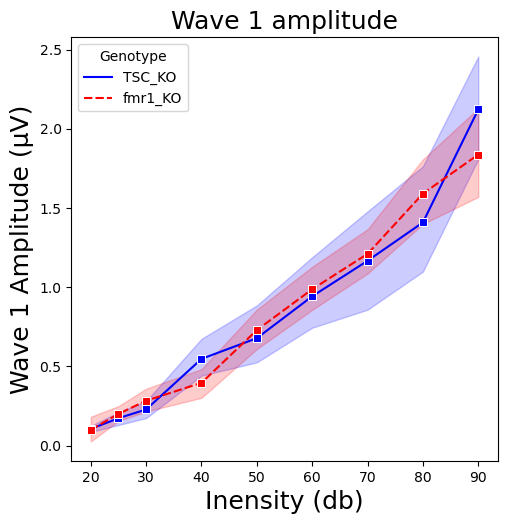

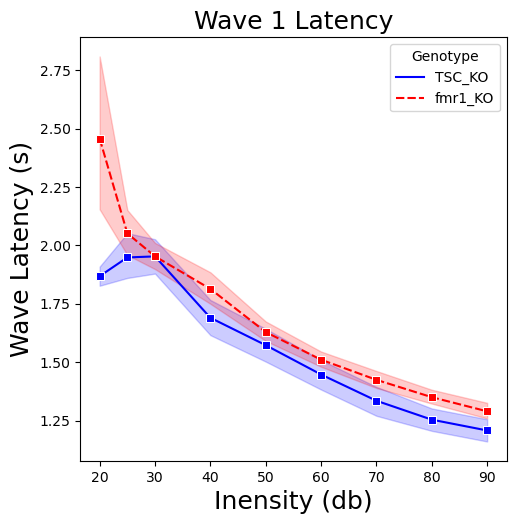

In [68]:
# graph wave 1 amplitude
fig1,ax1 = plt.subplots()
colors = ["#0000FF","#FF0000"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=wave1_all_ko, x="current_inten", y="Wave_amp",hue = "Genotype",style='Genotype',ci=95,marker='s')
plt.ylabel('Wave 1 Amplitude (µV)', fontsize=18)
plt.xlabel('Inensity (db)', fontsize=18)
plt.title('Wave 1 amplitude', fontsize=18)
plt.savefig('ko_wave1_amp.pdf',dpi=200)

# graph wave 1 latency
fig1,ax1 = plt.subplots()
colors = ["#0000FF","#FF0000"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=wave1_all_ko, x="current_inten", y="Wave_lat",hue = "Genotype",style='Genotype',ci=95,marker='s')
plt.ylabel('Wave Latency (s)', fontsize=18)
plt.xlabel('Inensity (db)', fontsize=18)
plt.title('Wave 1 Latency', fontsize=18)
plt.savefig('ko_wave4_lat.pdf',dpi=200)

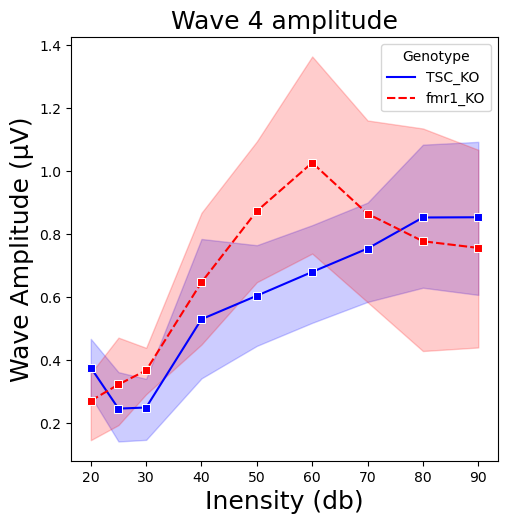

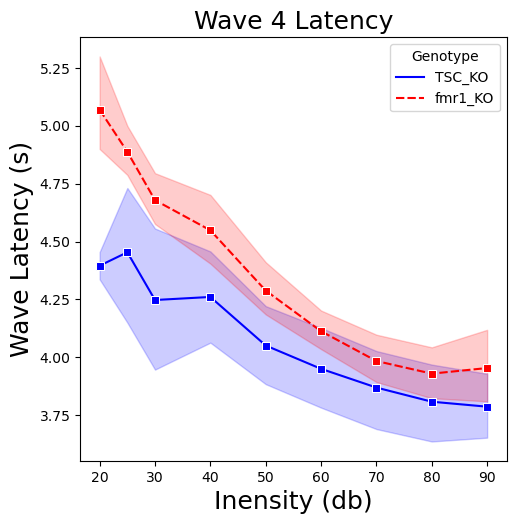

In [69]:

# graph wave 4 amplitude
fig1,ax1 = plt.subplots()
colors = ["#0000FF","#FF0000"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=wave4_all_ko, x="current_inten", y="Wave_amp",hue = "Genotype",style='Genotype',ci=95,marker='s')
plt.ylabel('Wave Amplitude (µV)', fontsize=18)
plt.xlabel('Inensity (db)', fontsize=18)
plt.title('Wave 4 amplitude', fontsize=18)
plt.savefig('ko_wave4_amp.pdf',dpi=200)

# graph wave 4 latency
fig1,ax1 = plt.subplots()
colors = ["#0000FF","#FF0000"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=wave4_all_ko, x="current_inten", y="Wave_lat",hue = "Genotype",style='Genotype',ci=95,marker='s')
plt.ylabel('Wave Latency (s)', fontsize=18)
plt.xlabel('Inensity (db)', fontsize=18)
plt.title('Wave 4 Latency', fontsize=18)
plt.savefig('ko_wave4_lat.pdf',dpi=200)

In [189]:
# compare LE and SD fmr1 WT

rat_00066 = pd.read_csv('00066.csv') # get rat
rat_00066['Genotype'] = "fmr1_SDWT" # add column with genotype
rat_00066['ID'] = "00066" # add rat number

rat_00125 = pd.read_csv('00125.csv') # get rat
rat_00125['Genotype'] = "fmr1_SDWT" # add column with genotype
rat_00125['ID'] = "00125" # add rat number

rat_00149_L = pd.read_csv('00149_L.csv') # get rat left ear
rat_00149_R = pd.read_csv('00149_R.csv') # get right ear
rat_00149 = pd.concat([rat_00149_L,rat_00149_R]) # combine left and right ears
rat_00149['Genotype'] = "fmr1_SDWT" # add column with genotype
rat_00149['ID'] = "00149" # add rat number

fmr1_SD_WT_ls = pd.concat([rat_00066,rat_00125,rat_00149]) # append the wildtype rats together

rat_00185 = pd.read_csv('BP4_00185.csv') # get rat
rat_00185['Genotype'] = "fmr1_LEWT" # add column with genotype
rat_00185['ID'] = "00137" # add rat number

rat_00187 = pd.read_csv('BP6_00187.csv') # get rat
rat_00187['Genotype'] = "fmr1_LEWT" # add column with genotype
rat_00187['ID'] = "00140" # add rat number

rat_00186 = pd.read_csv('LP2_00186.csv') # get rat
rat_00186['Genotype'] = "fmr1_LEWT" # add column with genotype
rat_00186['ID'] = "00153" # add rat number

fmr1_LE_WT_ls = pd.concat([rat_00185,rat_00187,rat_00186]) # append the wildtype rats together

fmr1_sp_ls = pd.concat([fmr1_LE_WT_ls,fmr1_SD_WT_ls])


fmr1_sp_ls = fmr1_sp_ls[fmr1_sp_ls.Wave_amp != 0] # removes every row where column 1 is 0
fmr1_LE_WT_ls = fmr1_LE_WT_ls.loc[fmr1_LE_WT_ls['current_freq'] == 0]
fmr1_SD_WT_ls = fmr1_SD_WT_ls.loc[fmr1_SD_WT_ls['current_freq'] == 0]
fmr1_sp_ls = fmr1_sp_ls.loc[fmr1_sp_ls['current_freq'] == 0]
fmr1_sp_ls

,Wave_amp,Wave_lat,current_inten,current_freq,current_ear,current_wave,current_rms,Genotype,ID
5,2.0640,1.300000,90,0,2,1,0.000001,fmr1_LEWT,00137
6,4.3680,2.100000,90,0,2,2,0.000001,fmr1_LEWT,00137
7,3.0240,2.918182,90,0,2,3,0.000001,fmr1_LEWT,00137
8,1.1040,4.045455,90,0,2,4,0.000001,fmr1_LEWT,00137
9,2.2800,4.790909,90,0,2,5,0.000001,fmr1_LEWT,00137
...,...,...,...,...,...,...,...,...,...
610,0.0744,2.200000,20,0,1,1,NaN,fmr1_SDWT,00149
611,0.4272,3.000000,20,0,1,2,NaN,fmr1_SDWT,00149
612,0.0456,3.945455,20,0,1,3,NaN,fmr1_SDWT,00149
613,0.4680,4.672727,20,0,1,4,NaN,fmr1_SDWT,00149


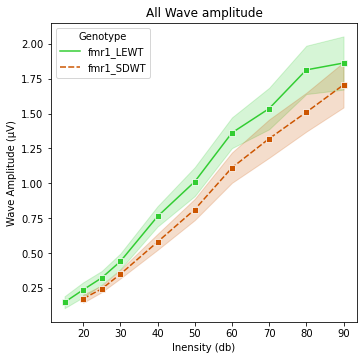

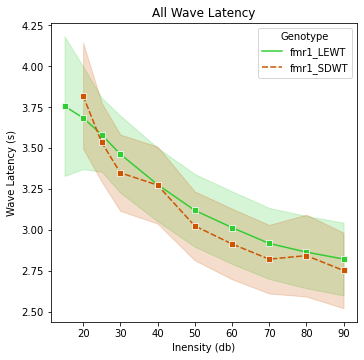

In [190]:
fig2,ax2 = plt.subplots()
colors = ["#32CD32","#CC5500"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=fmr1_sp_ls, x="current_inten", y="Wave_amp",hue = "Genotype",style='Genotype',errorbar=('se'),marker='s')
plt.ylabel('Wave Amplitude (µV)')
plt.xlabel('Inensity (db)')
plt.title('All Wave amplitude')
plt.savefig('Haichao_fmr1_SD&LE_allwave_amp.pdf',dpi=200)
# graph avg latency
fig2,ax2 = plt.subplots()
colors = ["#32CD32","#CC5500"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=fmr1_sp_ls, x="current_inten", y="Wave_lat",hue = "Genotype",style='Genotype',errorbar=('se'),marker='s')
plt.ylabel('Wave Latency (s)')
plt.xlabel('Inensity (db)')
plt.title('All Wave Latency')
plt.savefig('Haichao_fmr1_SD&LE_allwave_lat.pdf',dpi=200)

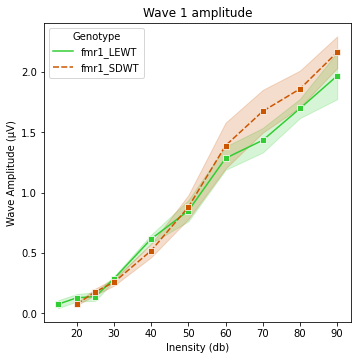

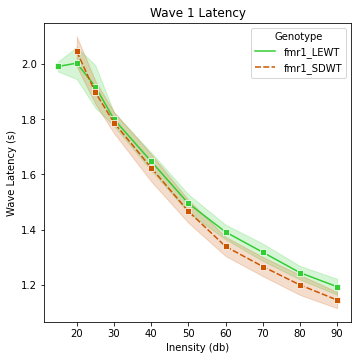

In [191]:
wave1_all_fmr1_SP = fmr1_sp_ls.loc[fmr1_sp_ls['current_wave'] == 1] # only want wave 1 data


# graph wave 1 amplitude
fig1,ax1 = plt.subplots()
colors = ["#32CD32","#CC5500"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=wave1_all_fmr1_SP, x="current_inten", y="Wave_amp",hue = "Genotype",style='Genotype',errorbar=('se'),marker='s')
plt.ylabel('Wave Amplitude (µV)')
plt.xlabel('Inensity (db)')
plt.title('Wave 1 amplitude')
plt.savefig('ko_wave4_amp.pdf',dpi=200)

# graph wave 1 latency
fig1,ax1 = plt.subplots()
colors = ["#32CD32","#CC5500"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=wave1_all_fmr1_SP, x="current_inten", y="Wave_lat",hue = "Genotype",style='Genotype',errorbar=('se'),marker='s')
plt.ylabel('Wave Latency (s)')
plt.xlabel('Inensity (db)')
plt.title('Wave 1 Latency')
plt.savefig('ko_wave4_lat.pdf',dpi=200)

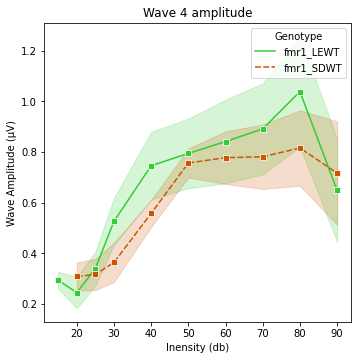

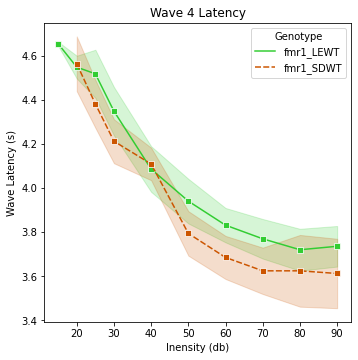

In [192]:
wave4_all_fmr1_SP = fmr1_sp_ls.loc[fmr1_sp_ls['current_wave'] == 4] # only want wave 4 data


# graph wave 4 amplitude
fig1,ax1 = plt.subplots()
colors = ["#32CD32","#CC5500"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=wave4_all_fmr1_SP, x="current_inten", y="Wave_amp",hue = "Genotype",style='Genotype',errorbar=('se'),marker='s')
plt.ylabel('Wave Amplitude (µV)')
plt.xlabel('Inensity (db)')
plt.title('Wave 4 amplitude')
plt.savefig('ko_wave4_amp.pdf',dpi=200)

# graph wave 4 latency
fig1,ax1 = plt.subplots()
colors = ["#32CD32","#CC5500"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=wave4_all_fmr1_SP, x="current_inten", y="Wave_lat",hue = "Genotype",style='Genotype',errorbar=('se'),marker='s')
plt.ylabel('Wave Latency (s)')
plt.xlabel('Inensity (db)')
plt.title('Wave 4 Latency')
plt.savefig('ko_wave4_lat.pdf',dpi=200)

In [193]:
# compare LE and SD fmr1 KO

rat_00181 = pd.read_csv('BP3_00181.csv') # get rat
rat_00181['Genotype'] = "fmr1_LEKO" # add column with genotype
rat_00181['ID'] = "00138" # add rat number

rat_00182 = pd.read_csv('BP5_00182.csv') # get rat
rat_00182['Genotype'] = "fmr1_LEKO" # add column with genotype
rat_00182['ID'] = "00139" # add rat number

rat_00183 = pd.read_csv('LP1_00183.csv') # get rat
rat_00183['Genotype'] = "fmr1_LEKO" # add column with genotype
rat_00183['ID'] = "00144" # add rat number


fmr1_LE_KO_ls = pd.concat([rat_00181,rat_00182,rat_00183]) # append the wildtype rats together


#non behavioral rat
rat_00067_L = pd.read_csv('00067_L.csv') # get rat left
rat_00067_R = pd.read_csv('00067_R.csv') # get rat right
rat_00067 = pd.concat([rat_00067_L,rat_00067_R]) # combine left and right ears
rat_00067['Genotype'] = "fmr1_SDKO" # add column with genotype
rat_00067['ID'] = "00067" # add rat number

rat_00033 = pd.read_csv('00033.csv') # get rat
rat_00033['Genotype'] = "fmr1_SDKO" # add column with genotype
rat_00033['ID'] = "00033" # add rat number

rat_00148 = pd.read_csv('00148.csv') # get rat left ear
rat_00148['Genotype'] = "fmr1_SDKO" # add column with genotype
rat_00148['ID'] = "00148" # add rat number



fmr1_SD_KO_ls = pd.concat([rat_00067,rat_00033,rat_00148]) # append the wildtype rats together

fmr1_sp_ko_ls = pd.concat([fmr1_LE_KO_ls,fmr1_SD_KO_ls])


fmr1_sp_ko_ls = fmr1_sp_ko_ls[fmr1_sp_ko_ls.Wave_amp != 0] # removes every row where column 1 is 0
fmr1_LE_KO_ls = fmr1_LE_KO_ls.loc[fmr1_LE_KO_ls['current_freq'] == 0]
fmr1_SD_KO_ls = fmr1_SD_KO_ls.loc[fmr1_SD_KO_ls['current_freq'] == 0]
fmr1_sp_ko_ls = fmr1_sp_ko_ls.loc[fmr1_sp_ko_ls['current_freq'] == 0]
fmr1_sp_ko_ls

,Wave_amp,Wave_lat,current_inten,current_freq,current_ear,current_wave,current_rms,Genotype,ID
5,1.6560,1.245455,90,0,2,1,0.000001,fmr1_LEKO,00138
6,5.4240,2.136364,90,0,2,2,0.000001,fmr1_LEKO,00138
7,2.8800,3.100000,90,0,2,3,0.000001,fmr1_LEKO,00138
8,0.7920,4.136364,90,0,2,4,0.000001,fmr1_LEKO,00138
9,2.8800,4.990909,90,0,2,5,0.000001,fmr1_LEKO,00138
...,...,...,...,...,...,...,...,...,...
1260,0.2744,1.981818,25,0,1,1,NaN,fmr1_SDKO,00148
1261,0.3864,2.927273,25,0,1,2,NaN,fmr1_SDKO,00148
1262,0.1204,3.836364,25,0,1,3,NaN,fmr1_SDKO,00148
1263,0.3248,4.927273,25,0,1,4,NaN,fmr1_SDKO,00148


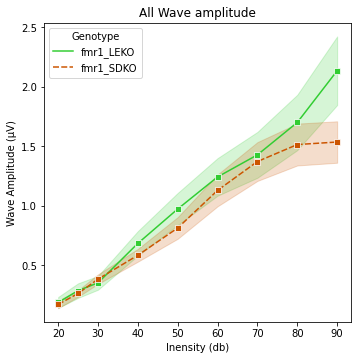

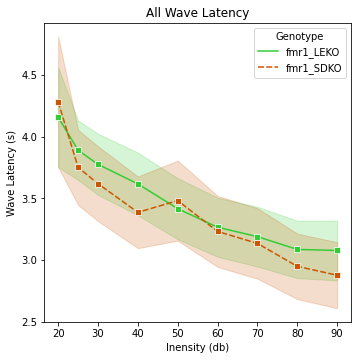

In [194]:
fig2,ax2 = plt.subplots()
colors = ["#32CD32","#CC5500"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=fmr1_sp_ko_ls, x="current_inten", y="Wave_amp",hue = "Genotype",style='Genotype',errorbar=('se'),marker='s')
plt.ylabel('Wave Amplitude (µV)')
plt.xlabel('Inensity (db)')
plt.title('All Wave amplitude')
plt.savefig('Haichao_fmr1_SD&LE_allwave_amp.pdf',dpi=200)
# graph avg latency
fig2,ax2 = plt.subplots()
colors = ["#32CD32","#CC5500"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=fmr1_sp_ko_ls, x="current_inten", y="Wave_lat",hue = "Genotype",style='Genotype',errorbar=('se'),marker='s')
plt.ylabel('Wave Latency (s)')
plt.xlabel('Inensity (db)')
plt.title('All Wave Latency')
plt.savefig('Haichao_fmr1_SD&LE_allwave_lat.pdf',dpi=200)

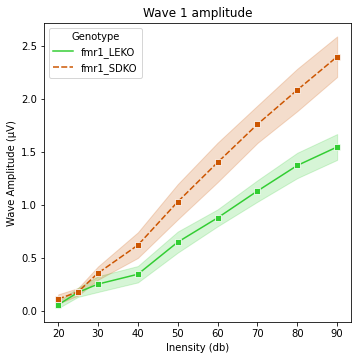

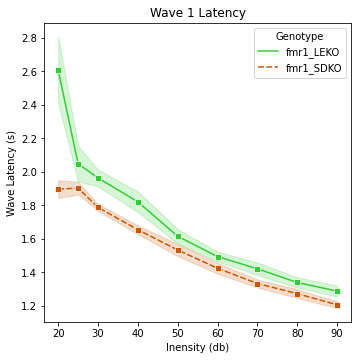

In [195]:
wave1_all_fmr1_SPKO = fmr1_sp_ko_ls.loc[fmr1_sp_ko_ls['current_wave'] == 1] # only want wave 1 data


# graph wave 1 amplitude
fig1,ax1 = plt.subplots()
colors = ["#32CD32","#CC5500"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=wave1_all_fmr1_SPKO, x="current_inten", y="Wave_amp",hue = "Genotype",style='Genotype',errorbar=('se'),marker='s')
plt.ylabel('Wave Amplitude (µV)')
plt.xlabel('Inensity (db)')
plt.title('Wave 1 amplitude')
plt.savefig('ko_wave4_amp.pdf',dpi=200)

# graph wave 1 latency
fig1,ax1 = plt.subplots()
colors = ["#32CD32","#CC5500"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=wave1_all_fmr1_SPKO, x="current_inten", y="Wave_lat",hue = "Genotype",style='Genotype',errorbar=('se'),marker='s')
plt.ylabel('Wave Latency (s)')
plt.xlabel('Inensity (db)')
plt.title('Wave 1 Latency')
plt.savefig('ko_wave4_lat.pdf',dpi=200)

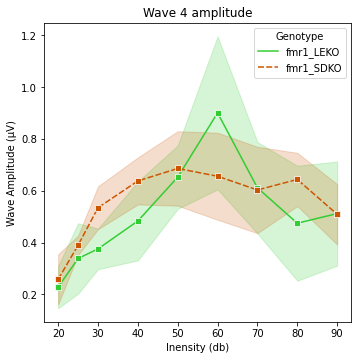

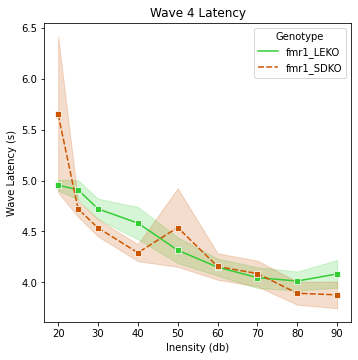

In [196]:
wave4_all_fmr1_SPKO = fmr1_sp_ko_ls.loc[fmr1_sp_ko_ls['current_wave'] == 4] # only want wave 4 data
# graph wave 1 amplitude
fig1,ax1 = plt.subplots()
colors = ["#32CD32","#CC5500"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=wave4_all_fmr1_SPKO, x="current_inten", y="Wave_amp",hue = "Genotype",style='Genotype',errorbar=('se'),marker='s')
plt.ylabel('Wave Amplitude (µV)')
plt.xlabel('Inensity (db)')
plt.title('Wave 4 amplitude')
plt.savefig('ko_wave4_amp.pdf',dpi=200)

# graph wave 1 latency
fig1,ax1 = plt.subplots()
colors = ["#32CD32","#CC5500"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=wave4_all_fmr1_SPKO, x="current_inten", y="Wave_lat",hue = "Genotype",style='Genotype',errorbar=('se'),marker='s')
plt.ylabel('Wave Latency (s)')
plt.xlabel('Inensity (db)')
plt.title('Wave 4 Latency')
plt.savefig('ko_wave4_lat.pdf',dpi=200)

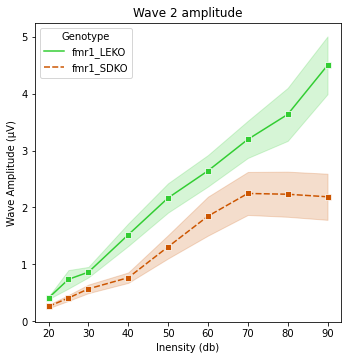

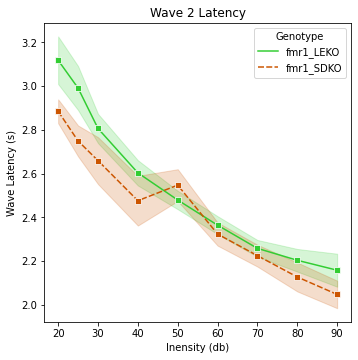

In [197]:
wave2_all_fmr1_SPKO = fmr1_sp_ko_ls.loc[fmr1_sp_ko_ls['current_wave'] == 2] # only want wave 2 data
# graph wave 2 amplitude
fig1,ax1 = plt.subplots()
colors = ["#32CD32","#CC5500"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=wave2_all_fmr1_SPKO, x="current_inten", y="Wave_amp",hue = "Genotype",style='Genotype',errorbar=('se'),marker='s')
plt.ylabel('Wave Amplitude (µV)')
plt.xlabel('Inensity (db)')
plt.title('Wave 2 amplitude')
plt.savefig('ko_wave2_amp.pdf',dpi=200)

# graph wave 2 latency
fig1,ax1 = plt.subplots()
colors = ["#32CD32","#CC5500"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=wave2_all_fmr1_SPKO, x="current_inten", y="Wave_lat",hue = "Genotype",style='Genotype',errorbar=('se'),marker='s')
plt.ylabel('Wave Latency (s)')
plt.xlabel('Inensity (db)')
plt.title('Wave 2 Latency')
plt.savefig('ko_wave2_lat.pdf',dpi=200)

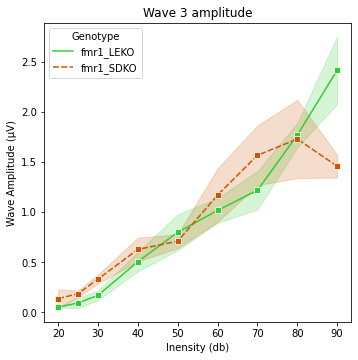

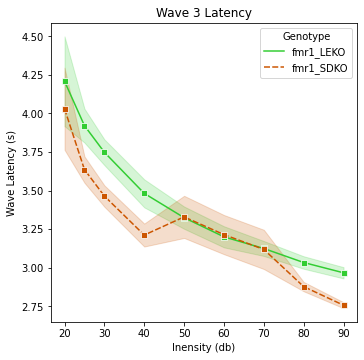

In [198]:
wave3_all_fmr1_SPKO = fmr1_sp_ko_ls.loc[fmr1_sp_ko_ls['current_wave'] == 3] # only want wave 3 data
# graph wave 3 amplitude
fig1,ax1 = plt.subplots()
colors = ["#32CD32","#CC5500"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=wave3_all_fmr1_SPKO, x="current_inten", y="Wave_amp",hue = "Genotype",style='Genotype',errorbar=('se'),marker='s')
plt.ylabel('Wave Amplitude (µV)')
plt.xlabel('Inensity (db)')
plt.title('Wave 3 amplitude')
plt.savefig('ko_wave3_amp.pdf',dpi=200)

# graph wave 3 latency
fig1,ax1 = plt.subplots()
colors = ["#32CD32","#CC5500"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=wave3_all_fmr1_SPKO, x="current_inten", y="Wave_lat",hue = "Genotype",style='Genotype',errorbar=('se'),marker='s')
plt.ylabel('Wave Latency (s)')
plt.xlabel('Inensity (db)')
plt.title('Wave 3 Latency')
plt.savefig('ko_wave3_lat.pdf',dpi=200)

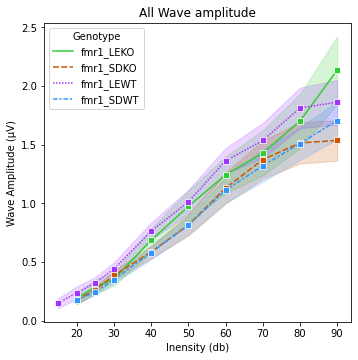

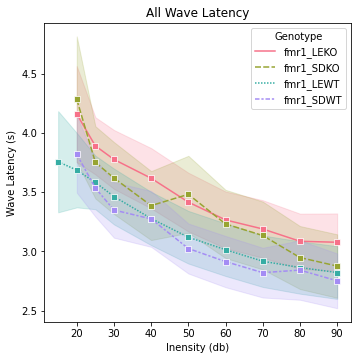

In [199]:
# LEKO vs. SDWT
fmr1_all_ls = pd.concat([fmr1_LE_KO_ls,fmr1_SD_KO_ls,fmr1_LE_WT_ls,fmr1_SD_WT_ls])

fmr1_all_ls = fmr1_all_ls[fmr1_all_ls.Wave_amp != 0] # removes every row where column 1 is 0
fmr1_LE_WT_ls = fmr1_LE_WT_ls.loc[fmr1_LE_WT_ls['current_freq'] == 0]
fmr1_SD_WT_ls = fmr1_SD_WT_ls.loc[fmr1_SD_WT_ls['current_freq'] == 0]
fmr1_LE_KO_ls = fmr1_LE_KO_ls.loc[fmr1_LE_KO_ls['current_freq'] == 0]
fmr1_SD_KO_ls = fmr1_SD_KO_ls.loc[fmr1_SD_KO_ls['current_freq'] == 0]
fmr1_all_ls = fmr1_all_ls.loc[fmr1_all_ls['current_freq'] == 0]


fig2,ax2 = plt.subplots()
colors = ["#32CD32","#CC5500","#A233FF","#3396FF"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=fmr1_all_ls, x="current_inten", y="Wave_amp",hue = "Genotype",style='Genotype',errorbar=('se'),marker='s')
plt.ylabel('Wave Amplitude (µV)')
plt.xlabel('Inensity (db)')
plt.title('All Wave amplitude')
plt.savefig('Haichao_fmr1_SD&LE_allwave_amp.pdf',dpi=200)
# graph avg latency
fig2,ax2 = plt.subplots()
colors = ["#32CD32","#CC5500"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=fmr1_all_ls, x="current_inten", y="Wave_lat",hue = "Genotype",style='Genotype',errorbar=('se'),marker='s')
plt.ylabel('Wave Latency (s)')
plt.xlabel('Inensity (db)')
plt.title('All Wave Latency')
plt.savefig('Haichao_fmr1_SD&LE_allwave_lat.pdf',dpi=200)

In [200]:
# Thresholds analysis
Thresholds_ls = pd.read_csv('thresholds.csv') # get csv
Thresholds_ls

,Threshold(dB),Genotype
0,25.0,Fmr1_KO
1,22.5,Fmr1_KO
2,22.5,Fmr1_KO
3,25.0,Fmr1_WT
4,15.0,Fmr1_WT
5,20.0,Fmr1_WT
6,25.0,TSC_Het
7,22.5,TSC_Het
8,20.0,TSC_Het
9,25.0,TSC_WT


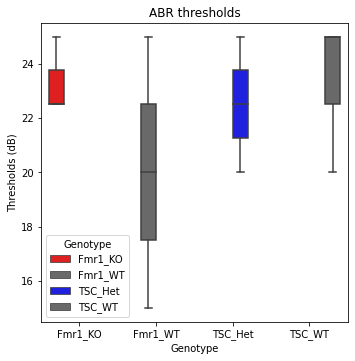

In [201]:
fig1,ax1 = plt.subplots()
colors = ["#FF0000","#696969","#0000FF","#696969"]
sns.set_palette(sns.color_palette(colors))
sns.boxplot(data=Thresholds_ls, x="Genotype", y="Threshold(dB)",hue = "Genotype")
plt.ylabel('Thresholds (dB)')
plt.xlabel('Genotype')
plt.title('ABR thresholds')
plt.savefig('Haichao_ABR thresholds.pdf',dpi=200)

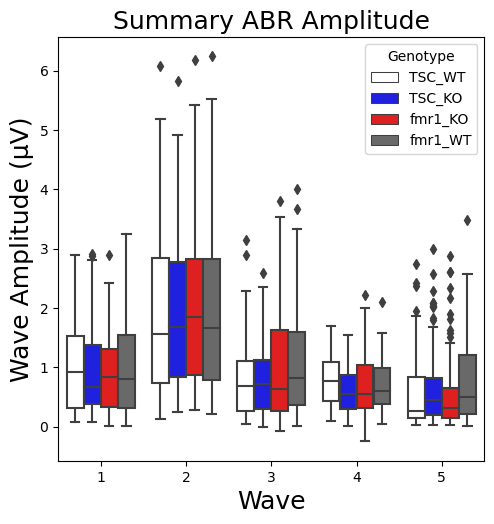

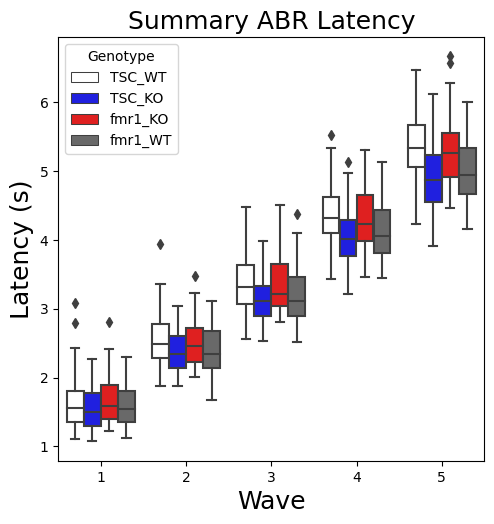

In [70]:
ALL_ls = pd.concat([TSC_all_ls,fmr1_ls])                
fig1,ax1 = plt.subplots()
colors = ["#FFFFFF","#0000FF","#FF0000","#696969"]
sns.set_palette(sns.color_palette(colors))
sns.boxplot(data=ALL_ls, x="current_wave", y="Wave_amp",hue = "Genotype")
plt.ylabel('Wave Amplitude (µV)', fontsize=18)
plt.xlabel('Wave', fontsize=18)
plt.title('Summary ABR Amplitude', fontsize=18)
plt.savefig('Haichao_ABR waves.pdf',dpi=400)
                   
fig1,ax1 = plt.subplots()
colors = ["#FFFFFF","#0000FF","#FF0000","#696969"]
sns.set_palette(sns.color_palette(colors))
sns.boxplot(data=ALL_ls, x="current_wave", y="Wave_lat",hue = "Genotype")
plt.ylabel('Latency (s)', fontsize=18)
plt.xlabel('Wave', fontsize=18)
plt.title('Summary ABR Latency', fontsize=18)
plt.savefig('Haichao_ABR waves2.pdf',dpi=400)
                

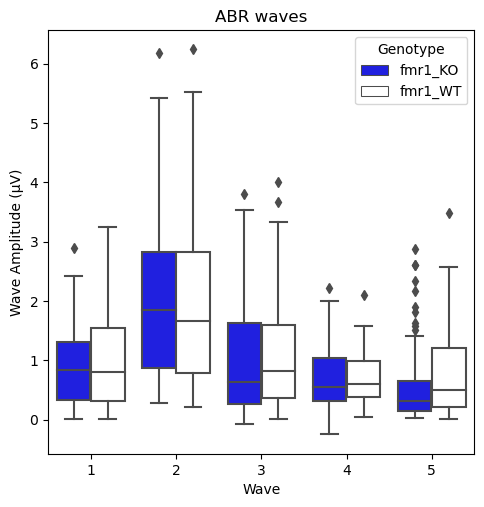

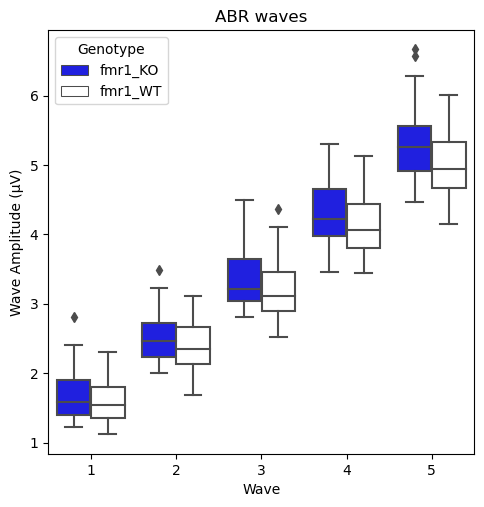

In [71]:
ALL_ls = pd.concat([TSC_all_ls,fmr1_ls])                
fig1,ax1 = plt.subplots()
colors = ["#0000FF","#FFFFFF","#FF0000","#696969"]
sns.set_palette(sns.color_palette(colors))
sns.boxplot(data=fmr1_ls, x="current_wave", y="Wave_amp",hue = "Genotype")
plt.ylabel('Wave Amplitude (µV)')
plt.xlabel('Wave')
plt.title('ABR waves')
plt.savefig('Haichao_ABR waves.pdf',dpi=400)
                   
fig1,ax1 = plt.subplots()
colors = ["#0000FF","#FFFFFF","#FF0000","#696969"]
sns.set_palette(sns.color_palette(colors))
sns.boxplot(data=fmr1_ls, x="current_wave", y="Wave_lat",hue = "Genotype")
plt.ylabel('Wave Amplitude (µV)')
plt.xlabel('Wave')
plt.title('ABR waves')
plt.savefig('Haichao_ABR waves2.pdf',dpi=400)

In [214]:
# Behavior analysis
Behavior_ls = pd.read_csv('Rxn times for Tsc2 and Fmr1.csv') # get csv
Behavior_ls

,Unnamed: 0,rat_ID,rat_name,Freq (kHz),Dur (ms),Intensity,Rxn,line,genotype,sex,Frequency
0,1,195,LP3,16,50,20,324.330237,Fmr1-LE,WT,M,16
1,2,195,LP3,16,50,30,291.014966,Fmr1-LE,WT,M,16
2,3,195,LP3,16,50,40,288.908135,Fmr1-LE,WT,M,16
3,4,197,LP4,16,50,30,504.619394,Fmr1-LE,KO,M,16
4,5,197,LP4,16,50,40,401.499418,Fmr1-LE,KO,M,16
...,...,...,...,...,...,...,...,...,...,...,...
1462,1463,160,TP4,16,50,10,626.492000,Tsc2-LE,WT,F,16
1463,1464,183,LP1,4,50,60,361.222500,Fmr1-LE,KO,M,4
1464,1465,183,LP1,4,50,70,350.134276,Fmr1-LE,KO,M,4
1465,1466,183,LP1,4,50,80,316.561867,Fmr1-LE,KO,M,4


In [216]:
# FMR1 analysis
rxntime_all_fmr1 = Behavior_ls.loc[Behavior_ls['line'] == "Fmr1-LE"]
rxntime_all_fmr1

,Unnamed: 0,rat_ID,rat_name,Freq (kHz),Dur (ms),Intensity,Rxn,line,genotype,sex,Frequency
0,1,195,LP3,16,50,20,324.330237,Fmr1-LE,WT,M,16
1,2,195,LP3,16,50,30,291.014966,Fmr1-LE,WT,M,16
2,3,195,LP3,16,50,40,288.908135,Fmr1-LE,WT,M,16
3,4,197,LP4,16,50,30,504.619394,Fmr1-LE,KO,M,16
4,5,197,LP4,16,50,40,401.499418,Fmr1-LE,KO,M,16
...,...,...,...,...,...,...,...,...,...,...,...
1418,1419,195,LP3,8,50,50,322.971072,Fmr1-LE,WT,M,8
1463,1464,183,LP1,4,50,60,361.222500,Fmr1-LE,KO,M,4
1464,1465,183,LP1,4,50,70,350.134276,Fmr1-LE,KO,M,4
1465,1466,183,LP1,4,50,80,316.561867,Fmr1-LE,KO,M,4


In [217]:
#BBN analysis
rxntime_BBN_fmr1 = rxntime_all_fmr1.loc[rxntime_all_fmr1['Freq (kHz)'] == 0]
rxntime_BBN_fmr1

,Unnamed: 0,rat_ID,rat_name,Freq (kHz),Dur (ms),Intensity,Rxn,line,genotype,sex,Frequency
10,11,210,Purple2,0,50,20,892.864079,Fmr1-LE,KO,M,BBN
11,12,210,Purple2,0,50,30,480.032375,Fmr1-LE,KO,M,BBN
12,13,210,Purple2,0,50,40,371.449583,Fmr1-LE,KO,M,BBN
13,14,210,Purple2,0,50,50,350.416067,Fmr1-LE,KO,M,BBN
14,15,210,Purple2,0,50,60,349.599991,Fmr1-LE,KO,M,BBN
...,...,...,...,...,...,...,...,...,...,...,...
1340,1341,209,Purple1,0,50,10,1028.804198,Fmr1-LE,WT,M,BBN
1342,1343,197,LP4,0,50,90,163.132929,Fmr1-LE,KO,M,BBN
1343,1344,197,LP4,0,100,90,155.205997,Fmr1-LE,KO,M,BBN
1344,1345,197,LP4,0,300,90,160.045614,Fmr1-LE,KO,M,BBN


In [292]:
results = rxntime_BBN_fmr1[((rxntime_BBN_fmr1['Intensity'] > 20) & (rxntime_BBN_fmr1['Intensity'] < 90))]
results

,Unnamed: 0,rat_ID,rat_name,Freq (kHz),Dur (ms),Intensity,Rxn,line,genotype,sex,Frequency
11,12,210,Purple2,0,50,30,480.032375,Fmr1-LE,KO,M,BBN
12,13,210,Purple2,0,50,40,371.449583,Fmr1-LE,KO,M,BBN
13,14,210,Purple2,0,50,50,350.416067,Fmr1-LE,KO,M,BBN
14,15,210,Purple2,0,50,60,349.599991,Fmr1-LE,KO,M,BBN
15,16,210,Purple2,0,50,70,330.023305,Fmr1-LE,KO,M,BBN
...,...,...,...,...,...,...,...,...,...,...,...
1289,1290,195,LP3,0,100,50,254.020559,Fmr1-LE,WT,M,BBN
1290,1291,195,LP3,0,100,60,240.173504,Fmr1-LE,WT,M,BBN
1291,1292,195,LP3,0,100,70,233.564753,Fmr1-LE,WT,M,BBN
1292,1293,195,LP3,0,100,80,228.923243,Fmr1-LE,WT,M,BBN


In [248]:
#get rid of data that below thresholds
rxntime_BBN_fmr1_clean = rxntime_BBN_fmr1.loc[rxntime_BBN_fmr1['Intensity'] > 20]
rxntime_BBN_fmr1_clean_clean = rxntime_BBN_fmr1_clean.loc[rxntime_BBN_fmr1_clean['Intensity'] < 90]
rxntime_BBN_fmr1_clean_clean

,Unnamed: 0,rat_ID,rat_name,Freq (kHz),Dur (ms),Intensity,Rxn,line,genotype,sex,Frequency
11,12,210,Purple2,0,50,30,480.032375,Fmr1-LE,KO,M,BBN
12,13,210,Purple2,0,50,40,371.449583,Fmr1-LE,KO,M,BBN
13,14,210,Purple2,0,50,50,350.416067,Fmr1-LE,KO,M,BBN
14,15,210,Purple2,0,50,60,349.599991,Fmr1-LE,KO,M,BBN
15,16,210,Purple2,0,50,70,330.023305,Fmr1-LE,KO,M,BBN
...,...,...,...,...,...,...,...,...,...,...,...
1289,1290,195,LP3,0,100,50,254.020559,Fmr1-LE,WT,M,BBN
1290,1291,195,LP3,0,100,60,240.173504,Fmr1-LE,WT,M,BBN
1291,1292,195,LP3,0,100,70,233.564753,Fmr1-LE,WT,M,BBN
1292,1293,195,LP3,0,100,80,228.923243,Fmr1-LE,WT,M,BBN


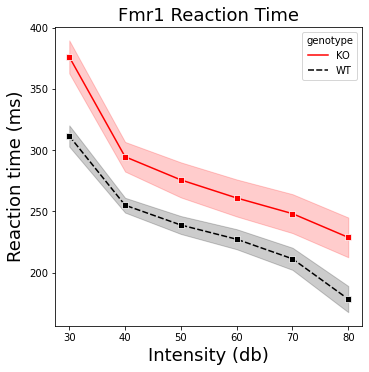

In [249]:
fig1,ax1 = plt.subplots()
colors = ["#FF0000","#000000"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=rxntime_BBN_fmr1_clean_clean, x="Intensity", y="Rxn",hue = "genotype",style='genotype',errorbar=('se'),marker='s')
plt.ylabel('Reaction time (ms)', fontsize=18)
plt.xlabel('Intensity (db)', fontsize=18)
plt.title('Fmr1 Reaction Time', fontsize=18)
plt.savefig('fmr1_reaction_time.pdf',dpi=200)


In [232]:
# TSC analysis
rxntime_all_TSC = Behavior_ls.loc[Behavior_ls['line'] == "Tsc2-LE"]
rxntime_all_TSC

,Unnamed: 0,rat_ID,rat_name,Freq (kHz),Dur (ms),Intensity,Rxn,line,genotype,sex,Frequency
73,74,162,GP6,8,50,30,415.379526,Tsc2-LE,WT,M,8
74,75,162,GP6,8,50,40,302.609970,Tsc2-LE,WT,M,8
75,76,162,GP6,8,50,50,297.514342,Tsc2-LE,WT,M,8
76,77,162,GP6,8,50,60,305.762084,Tsc2-LE,WT,M,8
77,78,162,GP6,8,50,70,301.838063,Tsc2-LE,WT,M,8
...,...,...,...,...,...,...,...,...,...,...,...
1458,1459,161,GP5,8,50,20,821.820000,Tsc2-LE,Het,M,8
1459,1460,138,RP2,4,50,30,551.421886,Tsc2-LE,Het,M,4
1460,1461,141,RP5,32,50,0,599.898483,Tsc2-LE,Het,M,32
1461,1462,160,TP4,16,50,20,402.671253,Tsc2-LE,WT,F,16


In [233]:
#BBN analysis
rxntime_BBN_TSC = rxntime_all_TSC.loc[rxntime_all_TSC['Freq (kHz)'] == 0]
rxntime_BBN_TSC

,Unnamed: 0,rat_ID,rat_name,Freq (kHz),Dur (ms),Intensity,Rxn,line,genotype,sex,Frequency
84,85,164,TP6,0,50,20,500.720042,Tsc2-LE,Het,F,BBN
85,86,164,TP6,0,50,30,248.599233,Tsc2-LE,Het,F,BBN
86,87,164,TP6,0,50,40,218.040248,Tsc2-LE,Het,F,BBN
87,88,164,TP6,0,50,50,219.361908,Tsc2-LE,Het,F,BBN
88,89,164,TP6,0,50,60,179.427578,Tsc2-LE,Het,F,BBN
...,...,...,...,...,...,...,...,...,...,...,...
1363,1364,157,TP2,0,50,10,984.186500,Tsc2-LE,WT,F,BBN
1364,1365,138,RP2,0,100,90,239.939437,Tsc2-LE,Het,M,BBN
1366,1367,162,GP6,0,100,10,668.655896,Tsc2-LE,WT,M,BBN
1375,1376,164,TP6,0,300,90,78.711620,Tsc2-LE,Het,F,BBN


In [250]:
#get rid of data that below thresholds
rxntime_BBN_TSC_clean = rxntime_BBN_TSC.loc[rxntime_BBN_TSC['Intensity'] > 20]
rxntime_BBN_TSC_clean_clean = rxntime_BBN_TSC_clean.loc[rxntime_BBN_TSC_clean['Intensity'] < 90]
rxntime_BBN_TSC_clean_clean

,Unnamed: 0,rat_ID,rat_name,Freq (kHz),Dur (ms),Intensity,Rxn,line,genotype,sex,Frequency
85,86,164,TP6,0,50,30,248.599233,Tsc2-LE,Het,F,BBN
86,87,164,TP6,0,50,40,218.040248,Tsc2-LE,Het,F,BBN
87,88,164,TP6,0,50,50,219.361908,Tsc2-LE,Het,F,BBN
88,89,164,TP6,0,50,60,179.427578,Tsc2-LE,Het,F,BBN
89,90,164,TP6,0,50,70,166.787916,Tsc2-LE,Het,F,BBN
...,...,...,...,...,...,...,...,...,...,...,...
1226,1227,150,GP2,0,100,40,342.164092,Tsc2-LE,WT,M,BBN
1227,1228,150,GP2,0,100,50,333.403122,Tsc2-LE,WT,M,BBN
1228,1229,150,GP2,0,100,60,340.233023,Tsc2-LE,WT,M,BBN
1229,1230,150,GP2,0,100,70,330.296386,Tsc2-LE,WT,M,BBN


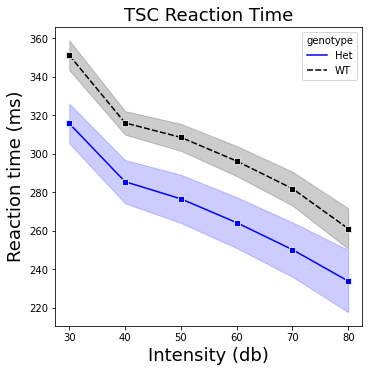

In [251]:
fig1,ax1 = plt.subplots()
colors = ["#0000FF","#000000"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=rxntime_BBN_TSC_clean_clean, x="Intensity", y="Rxn",hue = "genotype",style='genotype',errorbar=('se'),marker='s')
plt.ylabel('Reaction time (ms)', fontsize=18)
plt.xlabel('Intensity (db)', fontsize=18)
plt.title('TSC Reaction Time', fontsize=18)
plt.savefig('TSC_reaction_time.pdf',dpi=200)

In [287]:
# Thresholds analysis
Behavior_TH_ls = pd.read_csv('TH 2 for Tsc2 and Fmr1.csv') # get csv
Behavior_TH_ls

,Unnamed: 0,rat_ID,rat_name,Frequency,Duration,TH,line,genotype,sex
0,1,137,RP1,0,50,25.289563,Tsc2-WT,WT,M
1,2,137,RP1,0,100,24.181465,Tsc2-WT,WT,M
2,3,137,RP1,0,300,20.846034,Tsc2-WT,WT,M
3,4,137,RP1,4,50,34.028726,Tsc2-WT,WT,M
4,5,137,RP1,16,50,23.892127,Tsc2-WT,WT,M
...,...,...,...,...,...,...,...,...,...
182,183,211,Purple4,0,100,26.123171,Fmr1-WT,WT,M
183,184,211,Purple4,0,300,19.473793,Fmr1-WT,WT,M
184,185,213,Purple3,0,50,34.573530,Fmr1-KO,Mutant,M
185,186,213,Purple3,0,100,31.489202,Fmr1-KO,Mutant,M


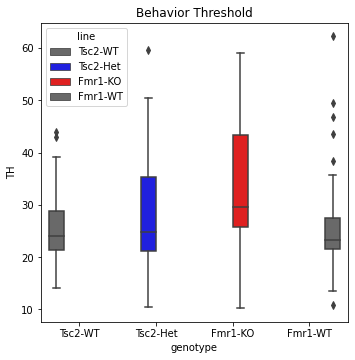

In [291]:
fig1,ax1 = plt.subplots()
colors = ["#696969","#0000FF","#FF0000","#696969"]
sns.set_palette(sns.color_palette(colors))
sns.boxplot(data=Behavior_TH_ls, x="line", y="TH", hue="line")
plt.xlabel('genotype')
plt.title('Behavior Threshold')
plt.savefig('Haichao_BH.pdf',dpi=400)